In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
upload=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
startup=pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.describe

<bound method NDFrame.describe of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Flori

In [6]:
startup.shape

(50, 5)

In [7]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

TypeError: ignored

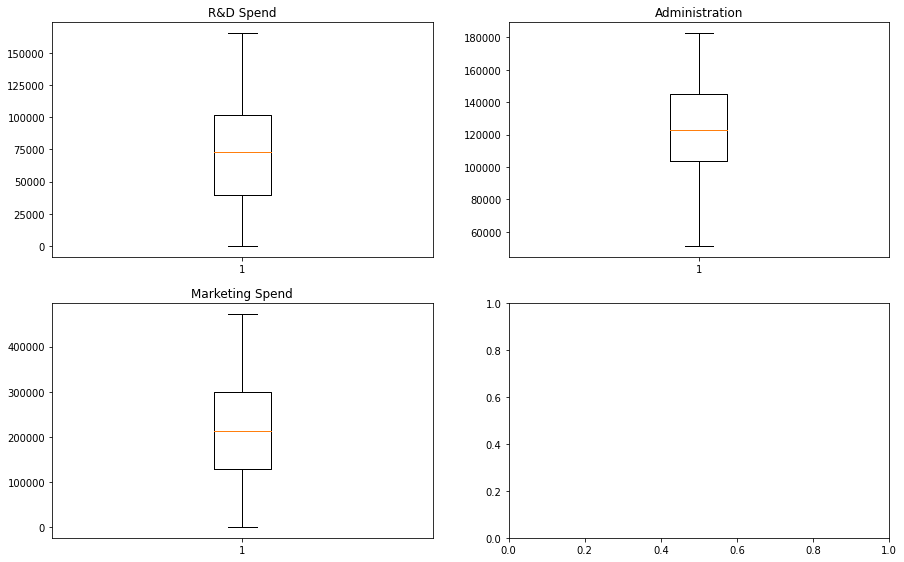

In [10]:
plt.figure(figsize=(15,25))
count=1
for col in startup:
 if (startup[col].dtypes =='0'):
   print('unique vlaues in {} = {}'.format(col[startup]).unique())
 else:
  plt.subplot(5,2,count)
  plt.boxplot(startup[col])
  plt.title(col)
  count +=1


In [11]:
startup.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [12]:
x = startup.iloc[:,:-1]
y = startup.iloc[:,-1]


In [13]:
x.shape

(50, 4)

In [14]:
y.shape

(50,)

In [15]:
x = startup[['R&D Spend', 'Administration', 'Marketing Spend']]

y = startup["Profit"]

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40, 3)
(40,)
(10, 3)
(10,)


In [18]:
#creating linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9393955917820569

In [22]:
import pickle

In [24]:
file = open('model.pkl','wb')

In [25]:
pickle.dump(model, file)